### Getting started with keras
This tutorial is inspired from https://keras.io

# Sequential model
Keras uses slightly different approach for initializing and defining layers. This approach is called Sequential model. Sequential model is a linear stack of several layers of neural network to be designed. So to defining each and every layer in the neural network we use Sequential class. This can be done in two different ways as shown below.  

In [144]:
#
# Import required packages
#
from keras.models import Sequential
from keras.layers import Dense, Activation

In [145]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline
import random

Either define entire neural network inside the constructor of the Sequential class as below,

In [146]:
#
# Network model can be initialized using following syntax in the constructor itself
#
model1 = Sequential([
    Dense(32,input_dim=784),
    Activation("relu"),
    Dense(10),
    Activation("softmax")
])

Or add layers to the network one by one as per convinience.

In [147]:
#
# Layers to the network can be added dynamically
#
model2 = Sequential()
model2.add(Dense(32, input_dim=784))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

The model needs to know what input shape it should expect i.e whether input is 28x28 (746 pixels) image or some numeric text or some other size features. 

For this reason, the first layer in a <span style="color:red;font-weight:bold">Sequential model</span> (and only the first, because following layers can do automatic shape inference from the shape of previous layers) needs to receive information about its input shape hence first <span style="color:red;font-weight:bold">model.add</span> function has extra argument of <span style="color:red;font-weight:bold">input_dim</span>. 

There are several possible ways to do this:

-- pass an <span style="color:red;font-weight:bold">input_shape</span> argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In <span style="color:red;font-weight:bold">input_shape</span>, the batch dimension is not included. 

e.g.  input_shape=(784,10) -> neural network shall have 10 inputs of 784 length each

     input_shape=(784,) or input_shape=(784,None) -> neural network shall have any positive number of inputs with 784 length each

-- pass instead a batch_input_shape argument, where the batch dimension is included. This is useful for specifying a fixed batch size (e.g. with stateful RNNs).

-- some 2D layers, such as Dense, support the specification of their input shape via the argument input_dim, and some 3D temporal layers support the arguments input_dim and input_length.

As such, the following three snippets are strictly equivalent:

In [148]:
model1 = Sequential()
model1.add(Dense(32, input_shape=(784,)))

In [149]:
model2 = Sequential()
model2.add(Dense(32, batch_input_shape=(None, 784)))
# note that batch dimension is "None" here,
# so the model will be able to process batches of any size with each input of length 784.

In [150]:
model3 = Sequential()
model3.add(Dense(32, input_dim=784))

Note that <span style="font-weight:bold">input_dim=784 is same as input_shape=(784,)</span>

## The Merge layer

Multiple Sequential instances can be merged into a single output via a Merge layer. The output is a layer that can be added as first layer in a new Sequential model. For instance, here's a model with two separate input branches getting merged:

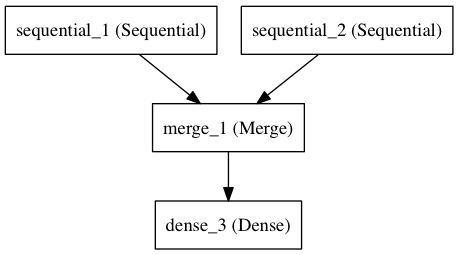

In [151]:
Image("keras_examples/keras_merge.png")

In [152]:
from keras.layers import Merge

left_branch = Sequential()
left_branch.add(Dense(32, input_dim=784))

right_branch = Sequential()
right_branch.add(Dense(32, input_dim=784))

merged = Merge([left_branch, right_branch], mode='concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, activation='softmax'))

Such a two-branch model can then be trained via e.g.:

In [ ]:
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
final_model.fit([input_data_1, input_data_2], targets)  # we pass one data array per model input

The Merge layer supports a number of pre-defined modes:

<ul>
<li>sum (default): element-wise sum</li>
<li>concat: tensor concatenation. You can specify the concatenation axis via the argument concat_axis.</li>
<li>mul: element-wise multiplication</li>
<li>ave: tensor average</li>
<li>dot: dot product. You can specify which axes to reduce along via the argument dot_axes.</li>
<li>cos: cosine proximity between vectors in 2D tensors.</li>
</ul>

You can also pass a function as the mode argument, allowing for arbitrary transformations:

In [ ]:
merged = Merge([left_branch, right_branch], mode=lambda x: x[0] - x[1])

Now you know enough to be able to define almost any model with Keras. For complex models that cannot be expressed via Sequential and Merge, you can use the functional API.

# Compilation

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

<ul>
<li>an optimizer, it is a type of optimizer to be used e.g. gradient descent. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the  Optimizer class. <a href="https://keras.io/optimizers" target="_blank">See: optimizers.</a> </li>
<li>a loss function, it is an error function to be optimized e.g. squered error function or cross-entropy function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. <a href="https://keras.io/objectives" target="_blank">See: objectives.</a></li>
<li>a list of metrics, to evaluate performance of the network. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function. Custom metric function should return either a single tensor value or a dict metric_name -> metric_value. <a href="https://keras.io/metrics" target="_blank">See: metrics.</a></li>

In [ ]:
# for a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# for a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# for a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# for custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def false_rates(y_true, y_pred):
    false_neg = ...
    false_pos = ...
    return {
        'false_neg': false_neg,
        'false_pos': false_pos,
    }

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred, false_rates])

# Training

Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the  fit function. <a href="https://keras.io/models/sequential" target="_blank">Read its documentation here.</a>



In [153]:
# for a single-input model with 2 classes (binary):

model = Sequential()
model.add(Dense(1, input_dim=784, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# generate dummy data
import numpy as np
data = np.random.random((1000, 784))
labels = np.random.randint(2, size=(1000, 1))

# train the model, iterating on the data in batches
# of 32 samples
model.fit(data, labels, nb_epoch=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.7246 - acc: 0.5100      
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.7144 - acc: 0.5220     

In [ ]:
# for a multi-input model with 10 classes:

left_branch = Sequential()
left_branch.add(Dense(32, input_dim=784))

right_branch = Sequential()
right_branch.add(Dense(32, input_dim=784))

merged = Merge([left_branch, right_branch], mode='concat')

model = Sequential()
model.add(merged)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# generate dummy data
import numpy as np
from keras.utils.np_utils import to_categorical
data_1 = np.random.random((1000, 784))
data_2 = np.random.random((1000, 784))

# these are integers between 0 and 9
labels = np.random.randint(10, size=(1000, 1))
# we convert the labels to a binary matrix of size (1000, 10)
# for use with categorical_crossentropy
labels = to_categorical(labels, 10)

# train the model
# note that we are passing a list of Numpy arrays as training data
# since the model has 2 inputs
model.fit([data_1, data_2], labels, nb_epoch=10, batch_size=32)

# Example 
Following is an example implementation of multi-layer perceptron on MNIST data set

First initialize all the libraries rerquired

In [155]:
# %load mnist_mlp.py
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

Simple function to display testdata with prediction results on the test dataset

In [156]:
def show_prediction_results(X_test,predicted_labels):
    for i,j in enumerate(random.sample(range(len(X_test)),10)):
        plt.subplot(5,2,i+1)
        plt.axis("off")
        plt.title("Predicted labels is "+str(np.argmax(predicted_labels[j])))
        plt.imshow(X_test[j].reshape(28,28))

Generating and structuring dataset for training and testing. We will be using 28x28 images from MNIST dataset of about 60000 for training and 10000 for testing. We will use batch size of 128, for classifying 10 numbers in the images. For small computations 20 epochs are used to these can be increased for more accuracy.

In [157]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


Start building Sequiential model in keras. We will use 3 layer MLP model for modelling the dataset.

In [158]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [159]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_27 (Dense)                 (None, 512)           401920      dense_input_14[0][0]             
____________________________________________________________________________________________________
activation_20 (Activation)       (None, 512)           0           dense_27[0][0]                   
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 512)           0           activation_20[0][0]              
____________________________________________________________________________________________________
dense_28 (Dense)                 (None, 512)           262656      dropout_11[0][0]                 
___________________________________________________________________________________________

Compiling model is configuring model with performance parameters such as loss function. metric and optimizer

In [160]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

<span style="color:red;font-weight:bold">fit function for model</span> fits the training data to neural network configured before

In [161]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_test, Y_test))

In [162]:
# Let's save the model in local file to fetch at later point in time to skip computations
# and directly start testing if need be
model.save_weights('mnist_mlp.hdf5')
with open('mnist_mlp.json', 'w') as f:
    f.write(model.to_json())

<span style="color:red;font-weight:bold">predict function for model</span> predicts labels or values for the testing data provided 

In [163]:
predicted_labels = model.predict(X_test,verbose=0)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.12476406681
Test accuracy: 0.9837


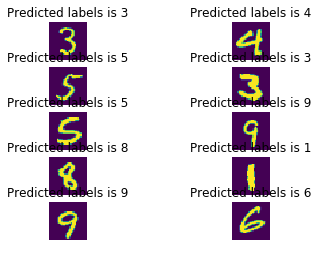

In [164]:
# Let's visualize some results randomly picked from testdata set and predicted labels for them
#
show_prediction_results(X_test,predicted_labels)